In [135]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
pd.options.display.float_format = '{:,.2f}'.format


In [136]:
def obtener_full_path(directorio):
    return [os.path.join(directorio, file) for file in os.listdir(directorio)]

def plottear(x, y, df):
    fig, axis = plt.subplots(1, 1, figsize=(30, 6))
    sns.barplot(data=df, x=x, y=y, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
    plt.show()
    return fig


In [137]:
df = pd.concat(map(lambda x: pd.read_csv(x, parse_dates=[
               0], dayfirst=True), obtener_full_path('input')))
df = df.sort_values('Fecha')


# Aquí se realizará el análisis del año completo en cuanto a los gastos

In [138]:
df_salidas = df.query('Movimiento == "Salida"')
costos_por_unidades = df_salidas.groupby('Destino').sum().reset_index()
costos_por_unidades['Porcentaje Gasto'] = costos_por_unidades['Neto Total'] / \
    costos_por_unidades['Neto Total'].sum()


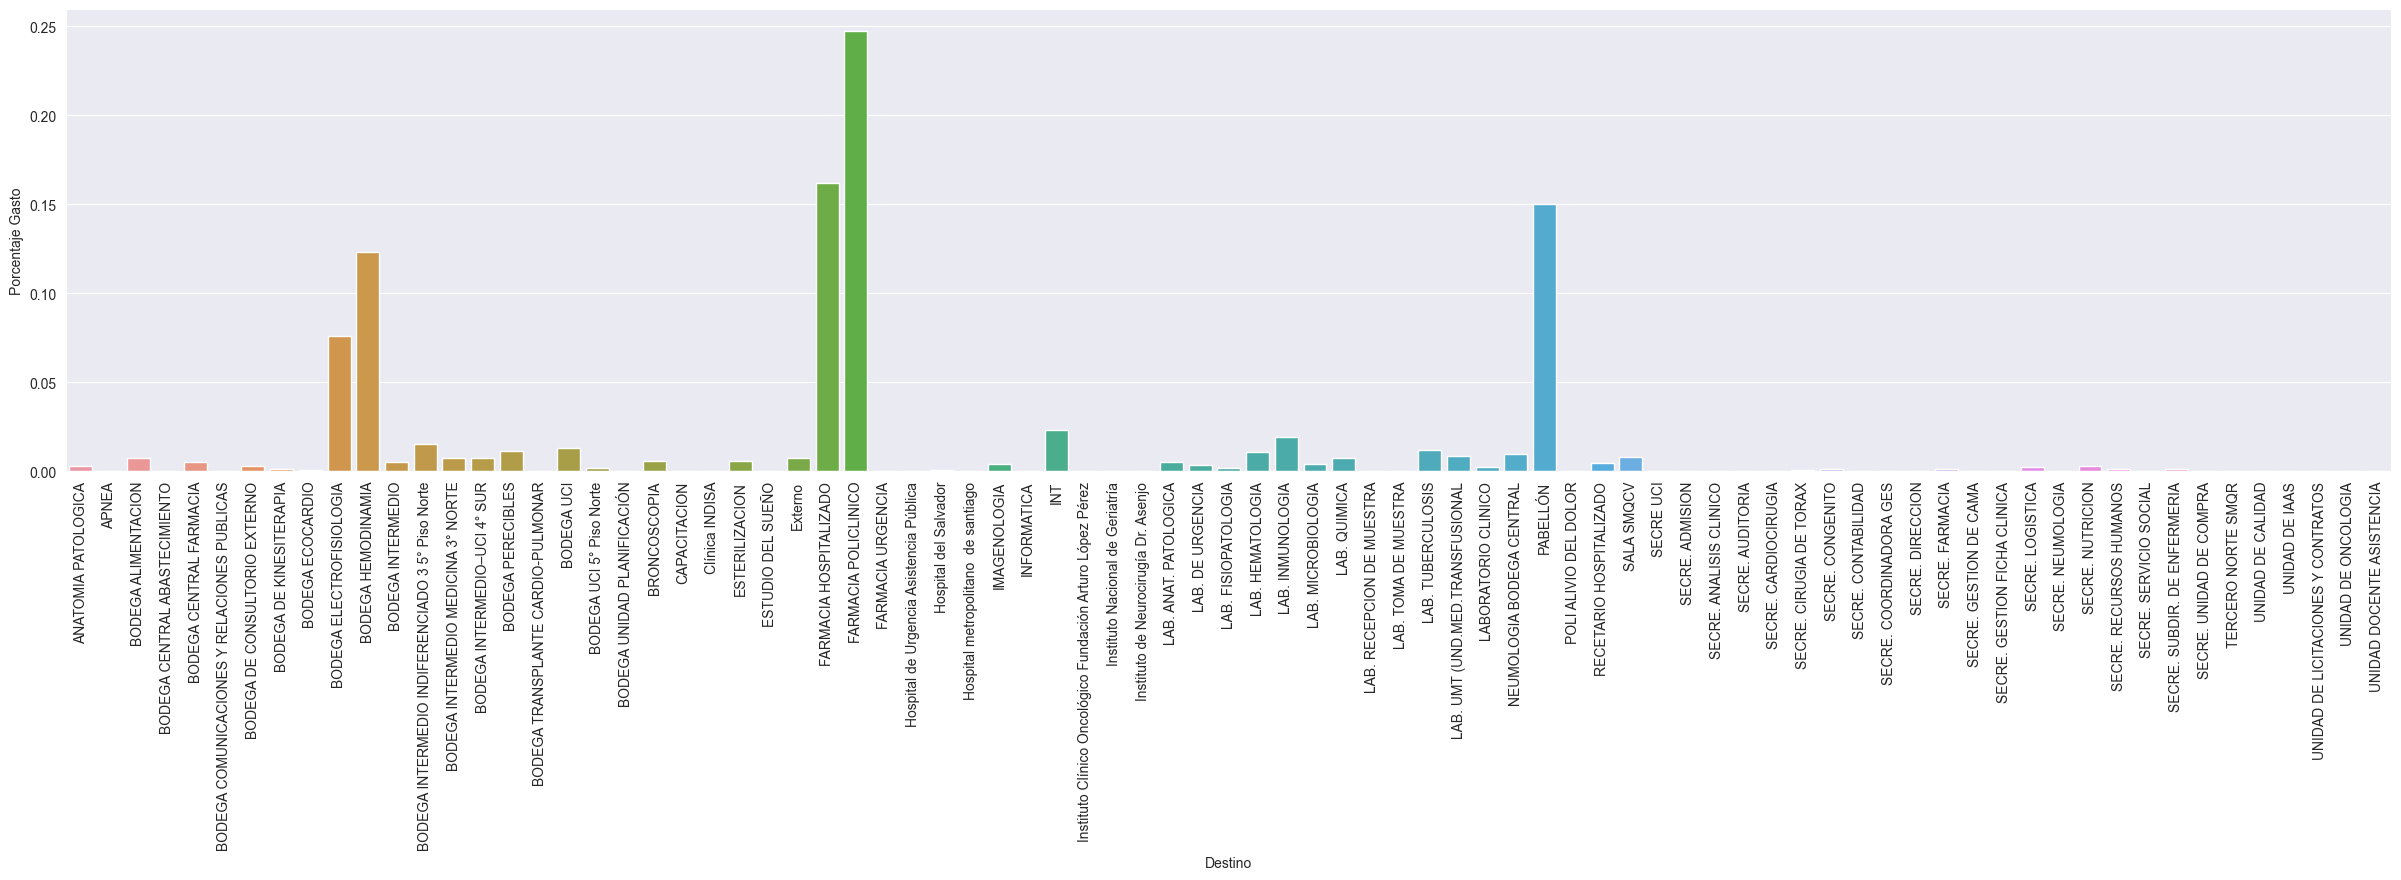

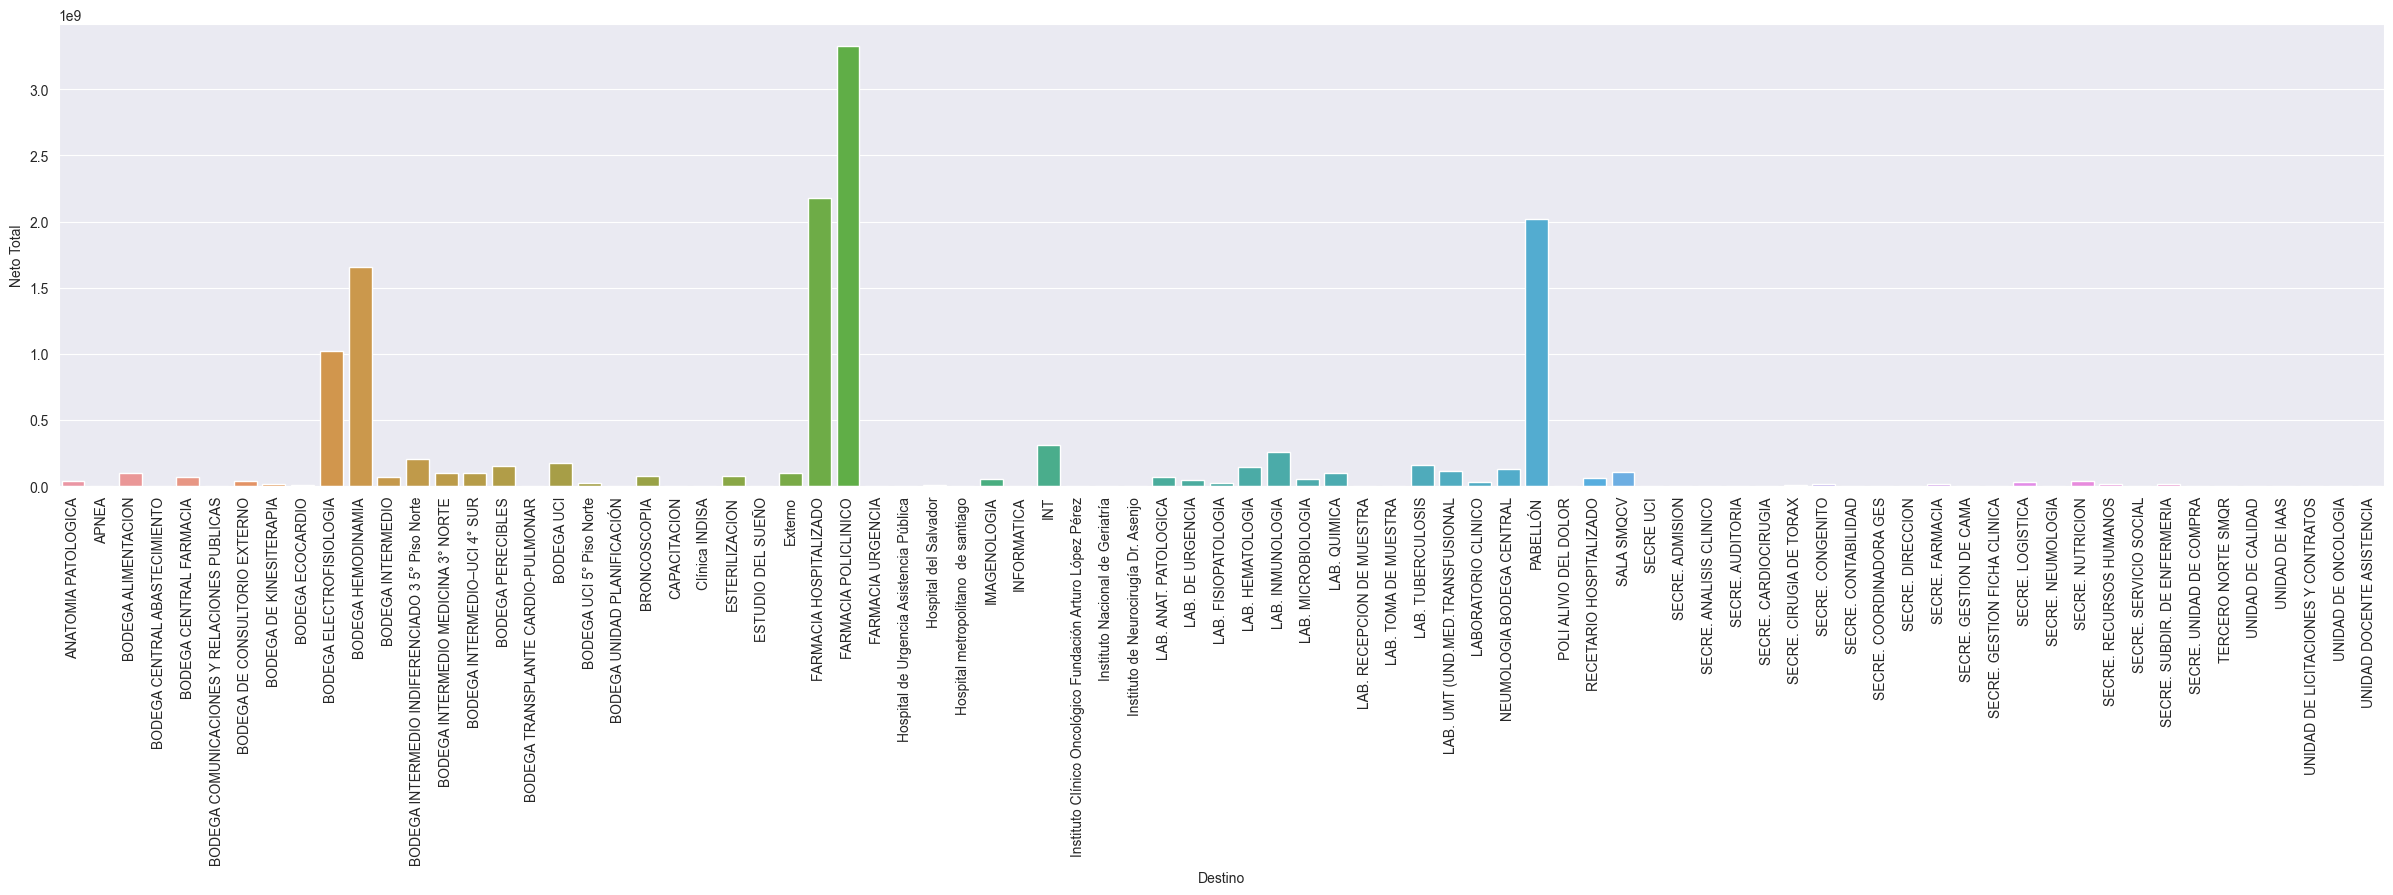

In [139]:
figura_porcentaje_global = plottear(x='Destino', y='Porcentaje Gasto', df=costos_por_unidades)
figura_gasto_neto_global = plottear(x='Destino', y='Neto Total', df=costos_por_unidades)


In [140]:
gastos_mayores_a_1000000000 = costos_por_unidades.query('`Neto Total` >= 1000000000')
gastos_menores_a_1000000000 = costos_por_unidades.query('`Neto Total` < 1000000000')

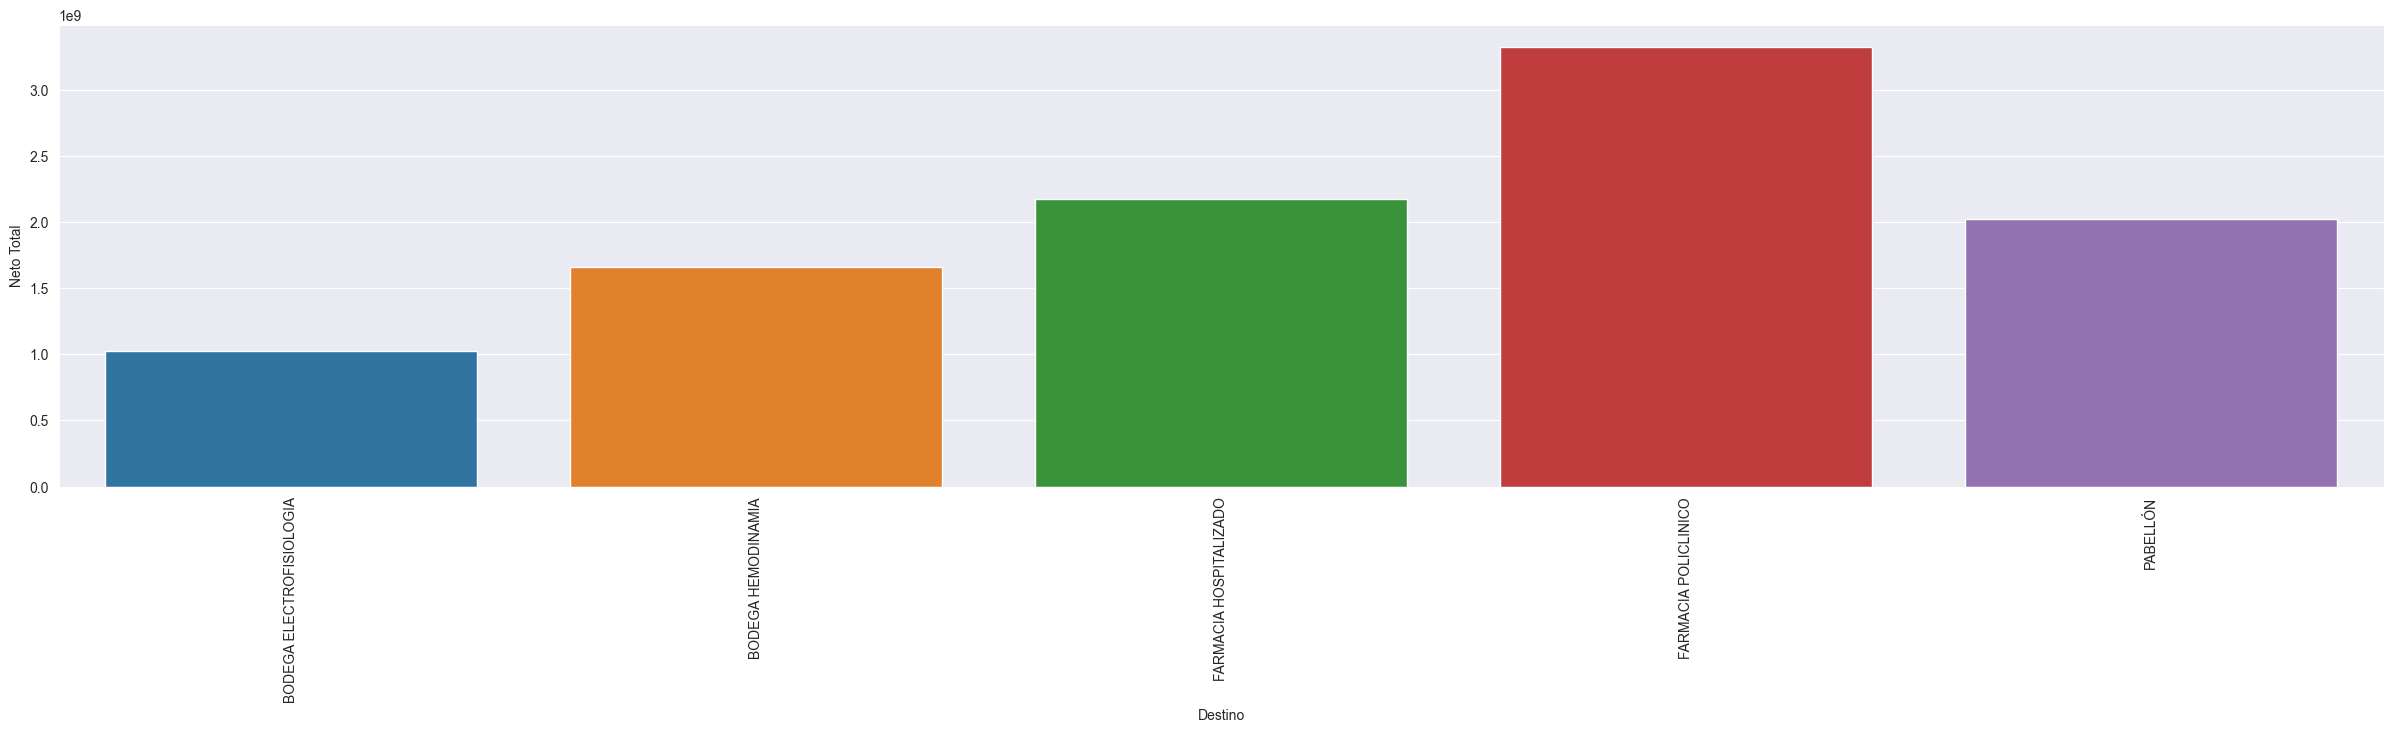

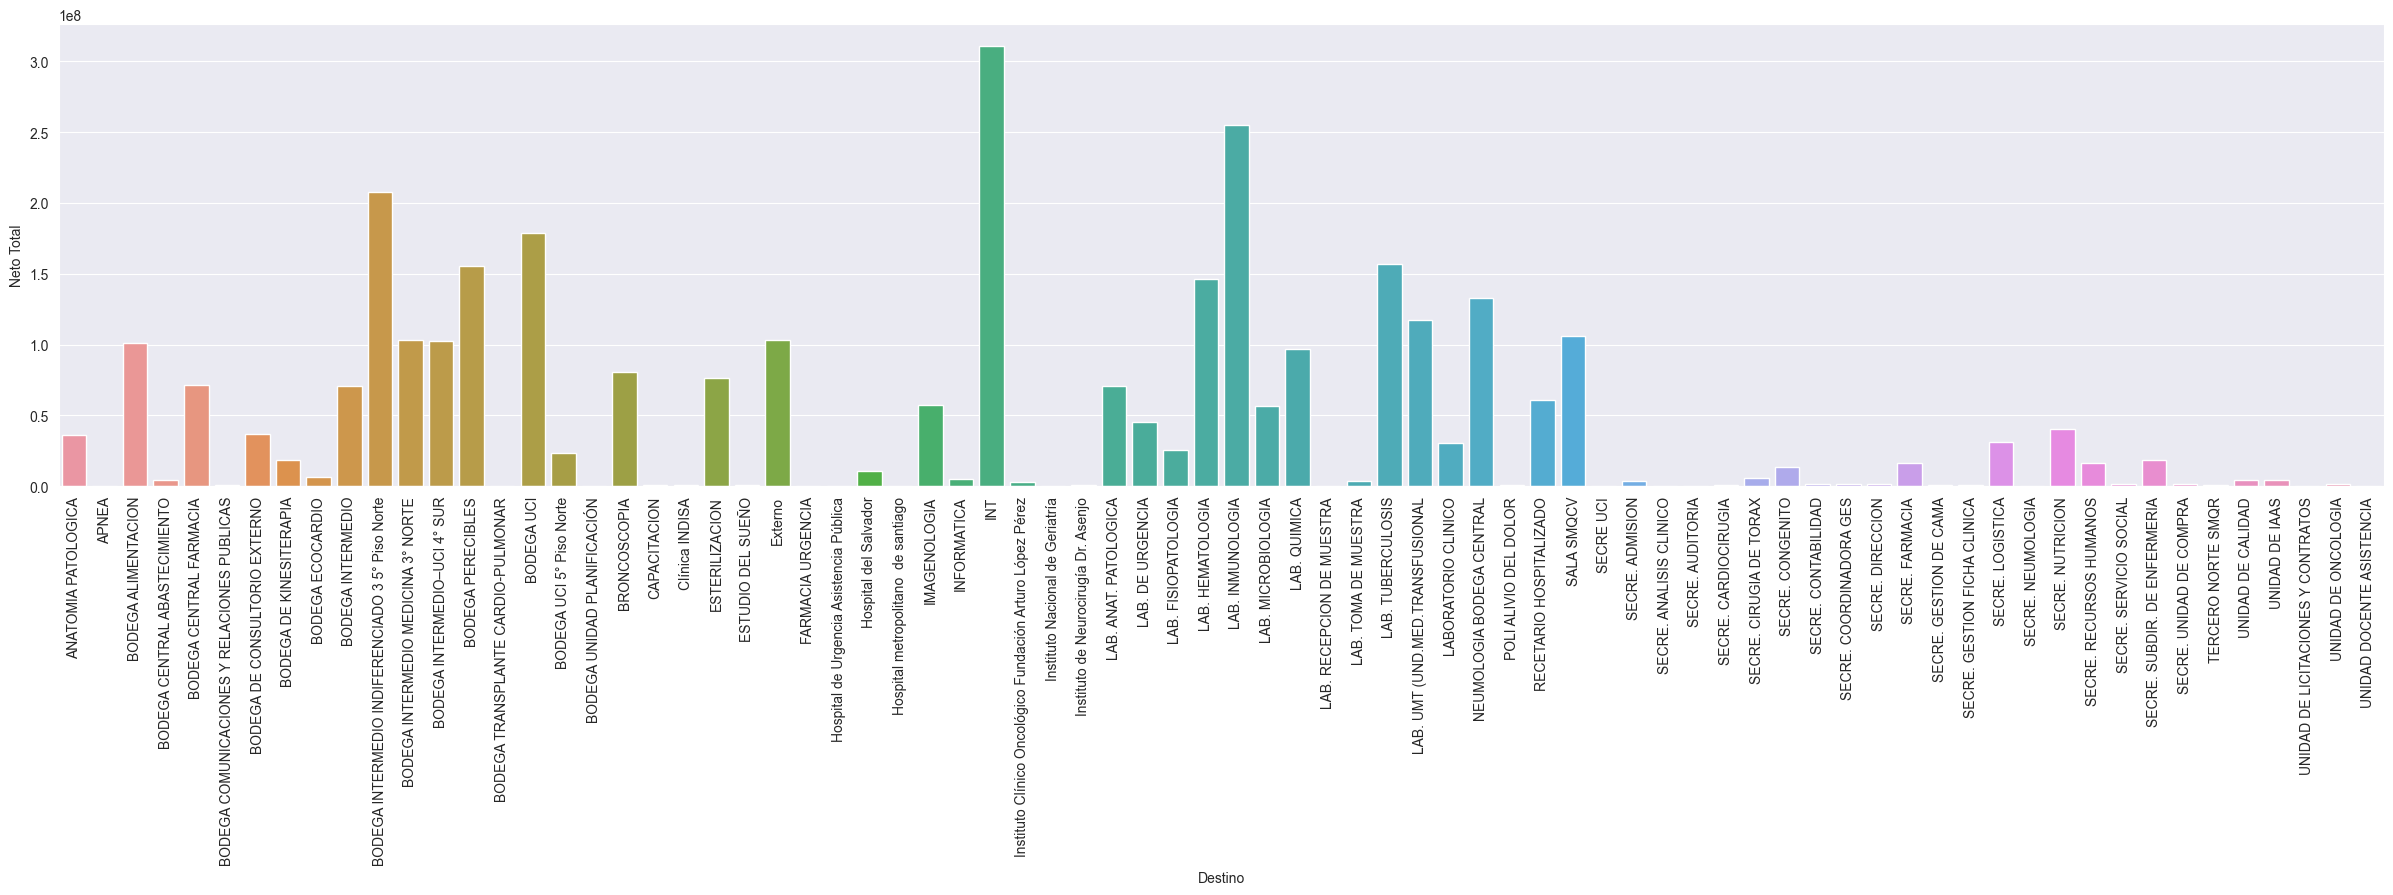

In [141]:
figura_gastos_mayores_a_1e9_total = plottear(x='Destino', y='Neto Total', df=gastos_mayores_a_1000000000)
figura_gastos_menores_a_1e9_total = plottear(x='Destino', y='Neto Total', df=gastos_menores_a_1000000000)

# En este apartado se realizará el análisis de desglose de artículos por servicio. Se observará
# cuales son los artículos que gastan más.

1. En primer lugar, se obtiene el df de los movimientos del servicio que se quiere analizar.
En este apartado se filtran los artículos que tengan una cantidad de 0 (aunque, por qué tienen
una cantidad de 0?)
2. Luego, se obtiene la suma por artículo utilizando un groupby, y sumando.
3. Finalmente, se grafica, ocupando ```x = "Nombre" e y = "Neto Total"```

De esta análisis se quieren responder las siguientes preguntas:

- ¿Cuántos artículos ha solicitado el servicio?
- ¿Cuáles son los 5 artículos que gastan más?

In [150]:
movimientos_farmacia_poli = df_salidas.query('Destino == "FARMACIA POLICLINICO" and '
                                             'Cantidad > 0')
articulos_servicio_suma = movimientos_farmacia_poli.groupby('Nombre') \
                                                   .sum() \
                                                   .reset_index() \
                                                   .sort_values('Neto Total', ascending=False)


In [175]:
diez_mas_gastadores = articulos_servicio_suma.head(10)
diez_menos_gastadores = articulos_servicio_suma.tail(10)

print(f'Los 10 artículos que más gastan en el servicio son:\n'
      f'{diez_mas_gastadores[["Nombre", "Cantidad", "Neto Total"]].to_markdown()}\n')


print(f'Los 10 artículos que menos gastan en el servicio son:\n'
      f'{diez_menos_gastadores[["Nombre", "Cantidad", "Neto Total"]].to_markdown()}\n')

Los 10 artículos que más gastan en el servicio son:
|     | Nombre                                                      |   Cantidad |   Neto Total |
|----:|:------------------------------------------------------------|-----------:|-------------:|
| 114 | ILOPROST 10 MCG AMP 1 ML (VENTAVIS)                         |      48442 |  5.44722e+08 |
|  19 | AMBRISENTAN 10 MG                                           |      17940 |  3.61642e+08 |
| 202 | RH-DORNASA-ALFA 2,5MG/2ML AMPOLLA                           |      16800 |  3.5721e+08  |
| 229 | TOBRAMICINA 28 MG CAP INHALACION                            |      33600 |  1.67327e+08 |
| 237 | TRIKAFTA ( elexacaftor, tezacaftor, ivacaftor)              |        588 |  1.6312e+08  |
| 180 | OSIMERTINIB 80 MG COMPRIMIDO                                |       1080 |  1.404e+08   |
| 186 | PANCRELIPASE LIPASE 25000/PROTEASE 79000/ AMYLASE 105000 UI |      35200 |  1.38583e+08 |
| 185 | PANCREATINA 25.000 UI (CREON) COMPR                       

In [166]:
diez_mas_gastadores

,Nombre,Cantidad,Neto Unitario,Neto Total
114,ILOPROST 10 MCG AMP 1 ML (VENTAVIS),48442,"587,781.00","544,721,562.00"
19,AMBRISENTAN 10 MG,17940,"448,520.00","361,641,600.00"
202,"RH-DORNASA-ALFA 2,5MG/2ML AMPOLLA",16800,"170,100.00","357,210,000.00"
229,TOBRAMICINA 28 MG CAP INHALACION,33600,"141,327.83","167,327,018.88"
237,"TRIKAFTA ( elexacaftor, tezacaftor, ivacaftor)",588,"277,414.42","163,119,678.96"
180,OSIMERTINIB 80 MG COMPRIMIDO,1080,"780,000.00","140,400,000.00"
186,PANCRELIPASE LIPASE 25000/PROTEASE 79000/ AMYL...,35200,"66,908.03","138,582,628.00"
185,PANCREATINA 25.000 UI (CREON) COMPR,129400,"12,296.00","99,939,800.00"
194,PIRFENIDONA 267 MG CAPSULA,191070,"18,854.00","98,835,600.00"
61,CRIZOTINIB 250 MG CAP (XALKORI),1980,"285,978.00","80,890,920.00"


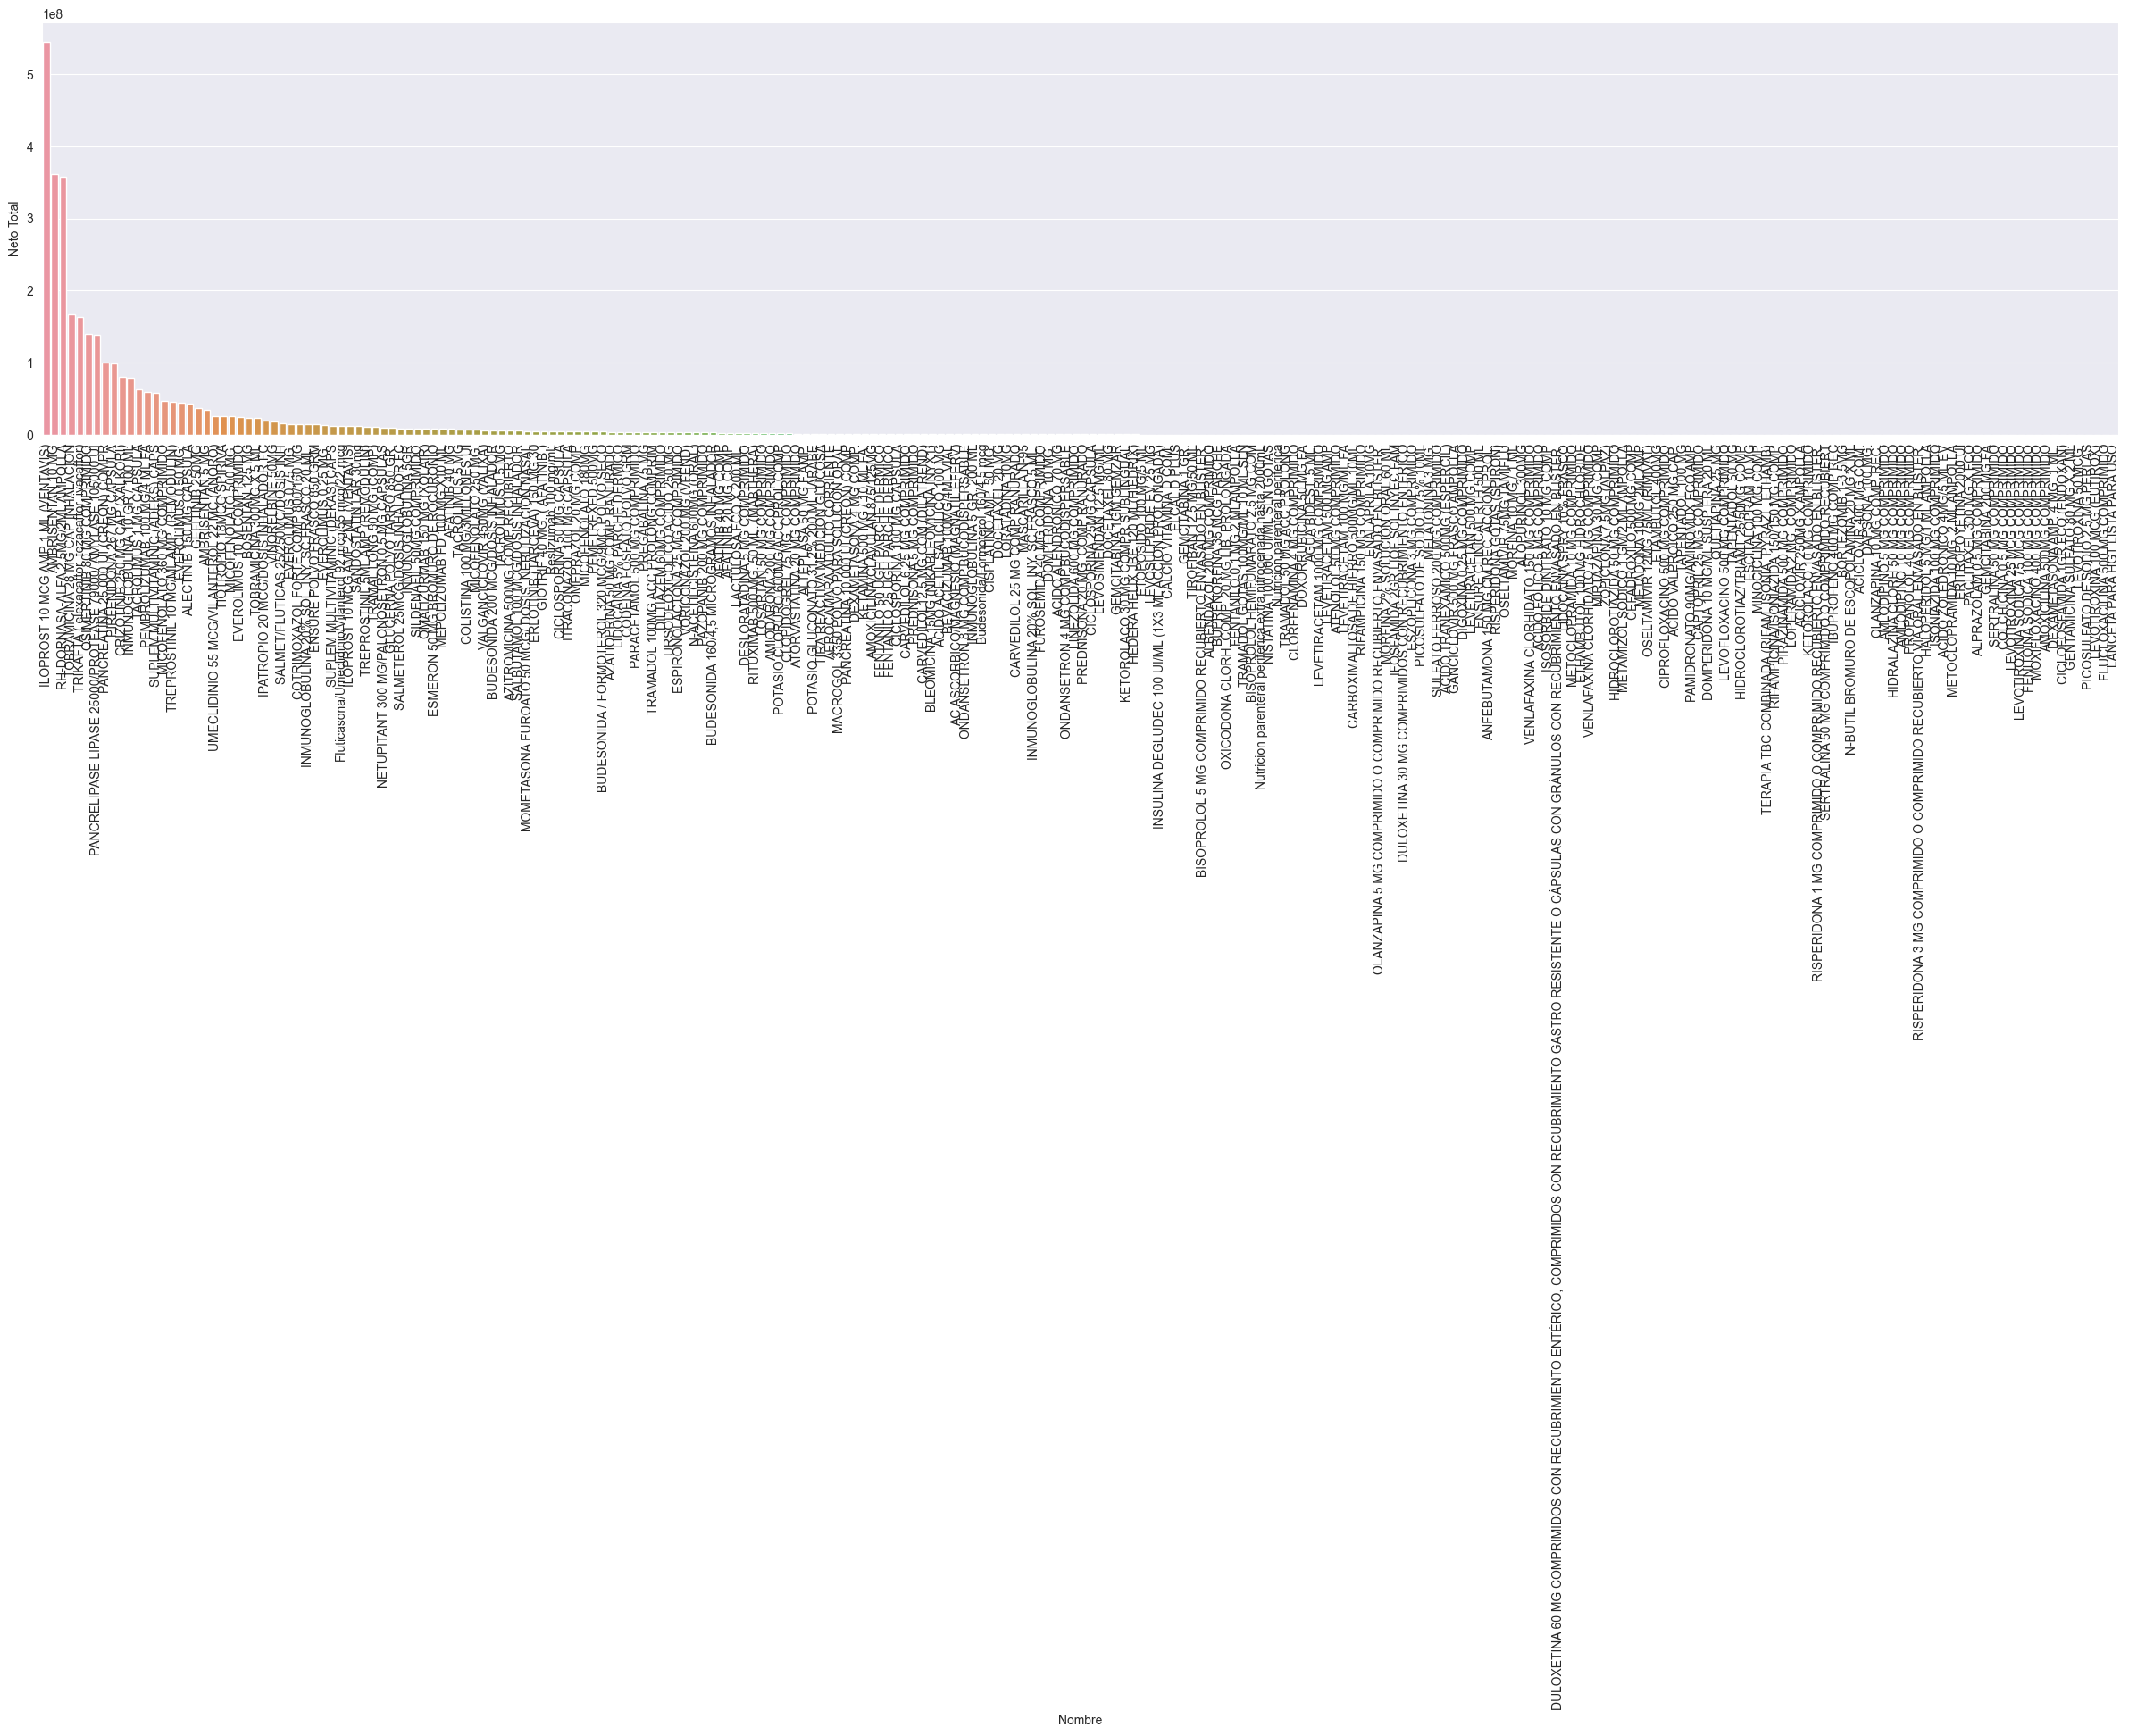

In [152]:
figura_articulos_servicio_suma = plottear(x='Nombre', y='Neto Total', df=articulos_servicio_suma)

In [163]:
q1 = articulos_servicio_suma['Neto Total'].quantile(0.25)
q2 = articulos_servicio_suma['Neto Total'].quantile(0.5)
q3 = articulos_servicio_suma['Neto Total'].quantile(0.75)

106282.5

In [162]:
articulos_servicio_suma.describe()

,Cantidad,Neto Unitario,Neto Total
count,246.00,246.00,246.00
mean,"18,932.96","167,538.37","13,515,896.77"
std,"54,550.73","853,893.39","52,141,162.51"
min,1.00,0.00,0.00
25%,151.25,391.70,"106,282.50"
50%,"1,367.00","3,759.00","783,800.00"
75%,"6,748.75","36,757.50","4,693,281.25"
max,"499,220.00","11,290,784.00","544,721,562.00"
